Student Name: Jomy Mathew

## Build an ANN model for Drug classification

## Loading the dataset

In [1]:
# loading the dataset using pandas library
import pandas as pd
data = pd.read_csv('DrugClassification.csv')
data.head() # for displaying first 5 rows

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


There are 6 columns: Age, Sex, BP, Cholesterol, Na_to_K (Soduim to Potassium), and corresponding Drug

## Shape of dataset (Number of Rows and Columns)

In [2]:
data.shape

(200, 6)

There are 200 rows and 6 columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We could see the datatypes and not null values

### Unique Value Counts

In [4]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

There are 5 types of Drugs in the dataset Drug (Y, X, A, C, B)

In [5]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

There are 3 classification of BP (High, Low, Normal)

In [6]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

There are 3 classification of Cholesterol (High, Normal)

In [7]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

## Checking for Missing Values

In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

There are no missing values in the dataset

## Visualizations

### Univariate Analysis

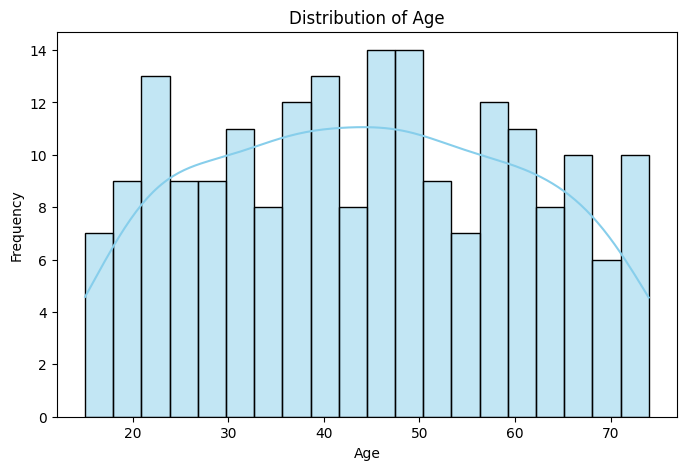

In [9]:
# Univariate analysis for Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We could see a even distribution of age from 20 to 70 years of age

<ipython-input-10-f7dbf147c0ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='pastel')


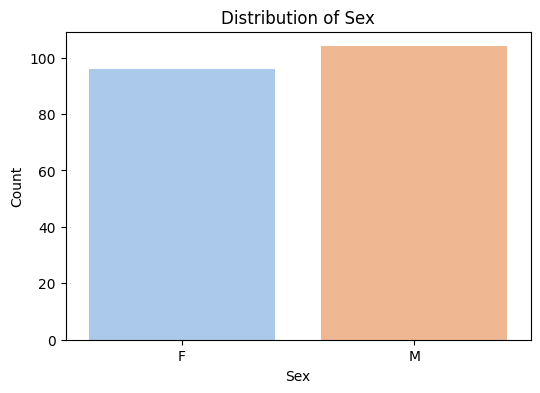

In [10]:
# Univariate analysis for Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Here, it is noticeable that Males are more than females in the dataset

<ipython-input-11-a95342e9cf30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=data, palette='pastel')


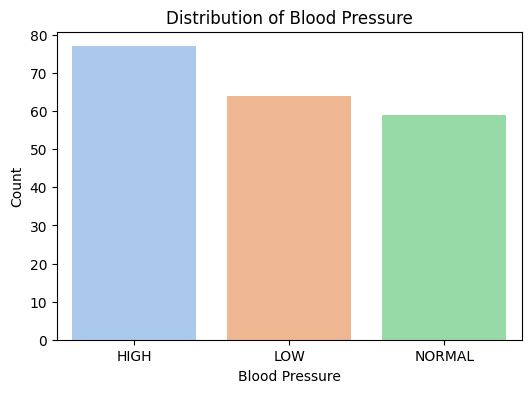

In [11]:
# Univariate analysis for BP
plt.figure(figsize=(6, 4))
sns.countplot(x='BP', data=data, palette='pastel')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

Most BP falls in HIGH range followed by LOW

<ipython-input-12-88cccfa52982>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=data, palette='pastel')


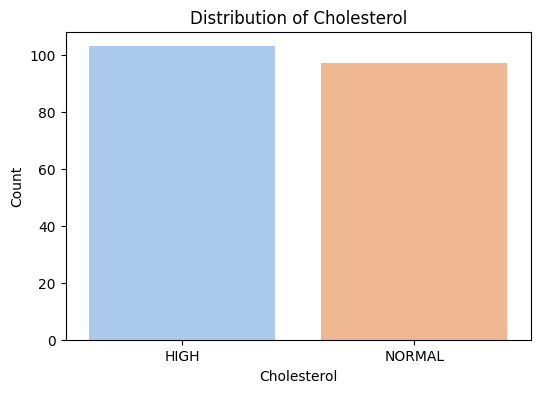

In [12]:
# Univariate analysis for Cholesterol
plt.figure(figsize=(6, 4))
sns.countplot(x='Cholesterol', data=data, palette='pastel')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

Here, the most data falls in High category of Cholesterol

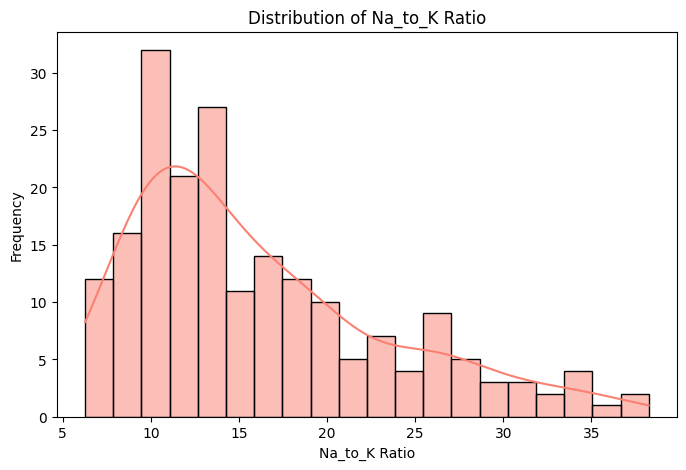

In [13]:
# Univariate analysis for Na_to_K
plt.figure(figsize=(8, 5))
sns.histplot(data['Na_to_K'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Na_to_K Ratio')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-6135241b6d06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=data, palette='pastel')


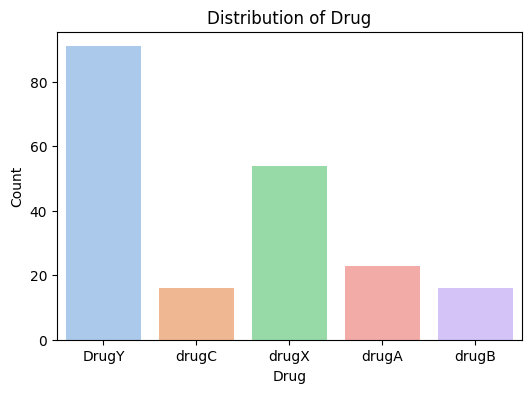

In [14]:
# Univariate analysis for Drug
plt.figure(figsize=(6, 4))
sns.countplot(x='Drug', data=data, palette='pastel')
plt.title('Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

It is noticeable that Drug Y is most commonly used followed by Drug x and Drug A

### Bi-Variate Analysis

<ipython-input-15-b9f4f890b78c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug', y='Age', data=data, palette='pastel')


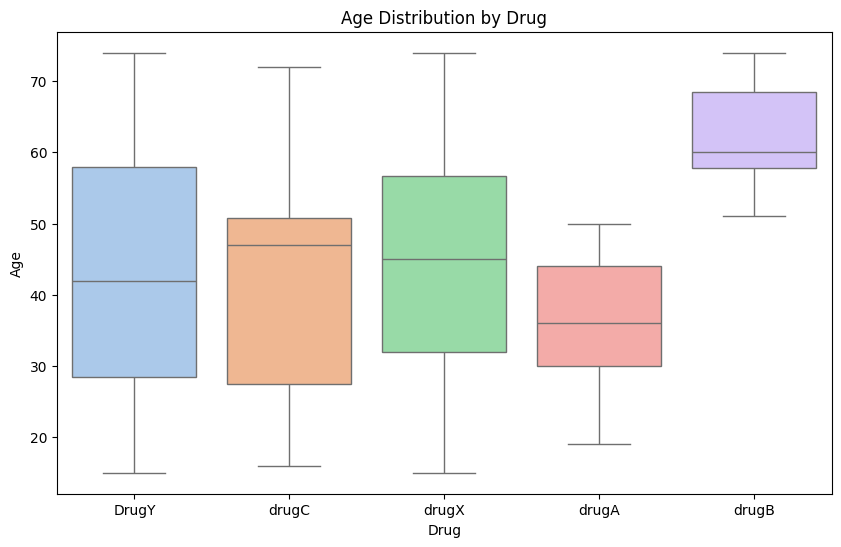

In [15]:
# Bivariate analysis between Age and Drug
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Age', data=data, palette='pastel')
plt.title('Age Distribution by Drug')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.show()

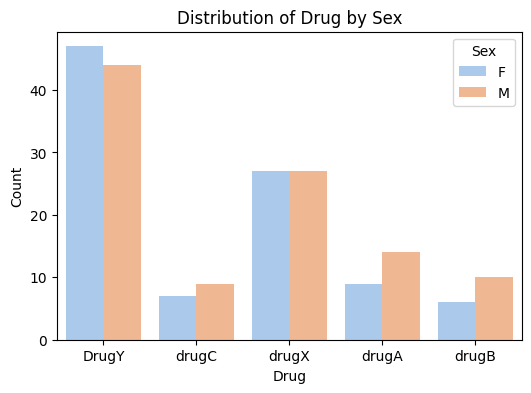

In [16]:
# Bivariate analysis between Sex and Drug
plt.figure(figsize=(6, 4))
sns.countplot(x='Drug', hue='Sex', data=data, palette='pastel')
plt.title('Distribution of Drug by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

Drug Y is consumed by mostly Females. Drug X is consumed by both Male and Female equally

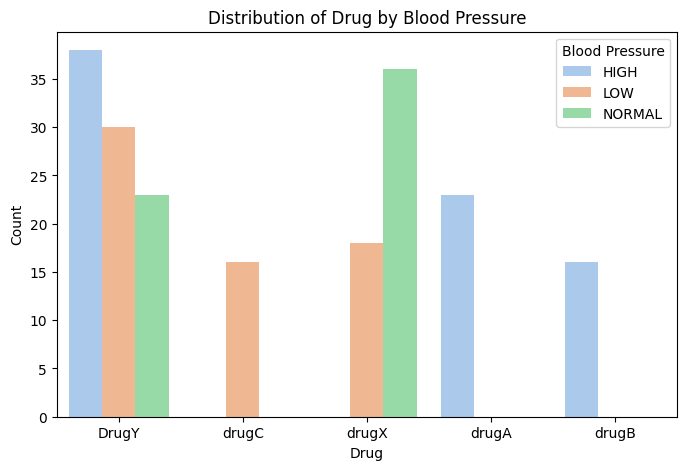

In [17]:
# Bivariate analysis between BP and Drug
plt.figure(figsize=(8, 5))
sns.countplot(x='Drug', hue='BP', data=data, palette='pastel')
plt.title('Distribution of Drug by Blood Pressure')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Blood Pressure')
plt.show()

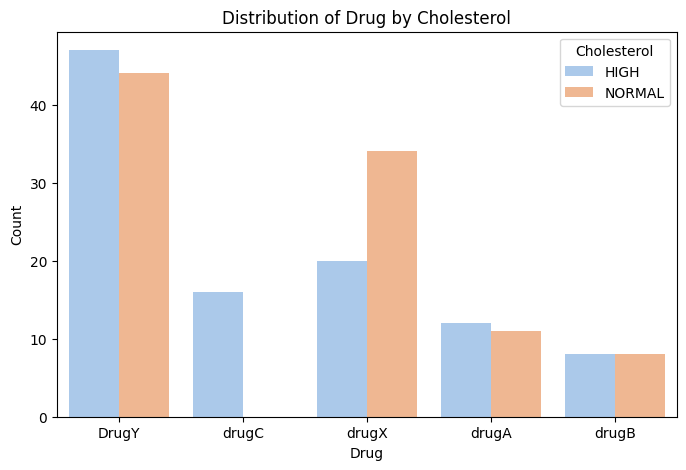

In [18]:
# Bivariate analysis between Cholesterol and Drug
plt.figure(figsize=(8, 5))
sns.countplot(x='Drug', hue='Cholesterol', data=data, palette='pastel')
plt.title('Distribution of Drug by Cholesterol')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Cholesterol')
plt.show()

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

In [20]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


## Multi - Variate Analysis

In [21]:
data.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


## X & Y (Independent & Dependent Variables)

In [23]:
# Split features and target variable
x = data.drop(columns=['Drug'])
y = data['Drug']

In [24]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [25]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

## Scaling

In [26]:
# Standardize features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [27]:
x

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427],
       [-1.35218642, -1.040833  ,  1.32976279, -0.97043679, -1.03769314],
       [ 0.28388946, -1.040833  ,  1.32976279, -0.97043679,  0.02643885],
       [-0.20087376,  0.96076892,  0.10979693, -0.97043679, -0.70046821],
       [ 0.9504389 ,  0.96076892,  1.32976279, -0.97043679, -0.12676951],
       [-0.07968296,  0.96076892,  0.10979693,  1.03046381,  0.45567206],
       [ 0.16269866, -1.040833  ,  0.10979693, -0.97043679, -0.59916196],
       [-0.62504158, -1.040833  , -1.11016894,  1.03046381,  0.43221897],
       [-0.07968296,  0.96076892,  0.10979693, -0.97043679, -0.09832049],
       [ 1.79877454, -1.040833  ,  0.1

## Spliting the Train - Test Split

In [47]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
print(x.shape, x_train.shape, y_train.shape)

(200, 5) (140, 5) (140,)


In [49]:
print(y.shape, x_test.shape, y_test.shape)

(200,) (60, 5) (60,)


## ANN Building

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

In [51]:
# Add input layer
model.add(Dense(units=5, activation='relu', input_dim=x_train.shape[1]))

In [52]:
# Add hidden layers
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))

In [53]:
# Add output layer
model.add(Dense(units=len(data['Drug'].unique()), activation='softmax'))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 1.6340 - accuracy: 0.3214 - val_loss: 1.7216 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.6033 - accuracy: 0.3571 - val_loss: 1.6818 - val_accuracy: 0.2857
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.5763 - accuracy: 0.3929 - val_loss: 1.6477 - val_accuracy: 0.2857
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.5546 - accuracy: 0.3839 - val_loss: 1.6138 - val_accuracy: 0.2857
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1.5298 - accuracy: 0.4554 - val_loss: 1.5816 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 1.5086 - accuracy: 0.6161 - val_loss: 1.5510 - val_accuracy: 0.5357
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 1.4869 - accuracy: 0.6339 - val_loss: 1.5206 - val_accuracy: 0.5357
Epoch 8/100
4/4 [===

In [62]:
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

2/2 [==============================] - 0s 11ms/step - loss: 0.4642 - accuracy: 0.8167
Test Loss: [0.4642157256603241, 0.8166666626930237]


In [61]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 8ms/step
Test Accuracy: 0.8166666666666667


## Predicting Random Data

In [59]:
import numpy as np

y_p = model.predict((scaler.transform([[61,	0,	1,	0,	18.043]])))

predicted_class = np.argmax(y_p)
predicted_drug = label_encoder.inverse_transform([predicted_class])[0]  #inversing the Standard Scaling

print("Predicted Drug:", predicted_drug)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
Predicted Drug: DrugY
